In [24]:
# Imports
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


np.random.seed(42)
tf.random.set_seed(42)

In [25]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Gustavo M" --iversions

Author: Gustavo M

matplotlib: 3.2.1
numpy     : 1.19.0
json      : 2.0.9
tensorflow: 2.2.0
pandas    : 1.0.5



In [32]:
# FASHION MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [33]:
# Neural Network with 2 dense layers

modelo = keras.models.Sequential()

modelo.add(keras.layers.Flatten(input_shape = [28, 28]))

modelo.add(keras.layers.Dense(300, activation = "relu"))

modelo.add(keras.layers.Dense(100, activation = "relu"))

modelo.add(keras.layers.Dense(10, activation = "softmax"))

In [34]:
# clearing session
keras.backend.clear_session()

In [35]:
# compiling
modelo.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [36]:
# Training
history = modelo.fit(X_train, 
                     y_train, 
                     epochs = 50, 
                     validation_data = (X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7013 - accuracy: 0.7692 - val_loss: 0.5177 - val_accuracy: 0.8196
Epoch 2/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4859 - accuracy: 0.8298 - val_loss: 0.4349 - val_accuracy: 0.8504
Epoch 3/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4429 - accuracy: 0.8439 - val_loss: 0.5361 - val_accuracy: 0.8000
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4166 - accuracy: 0.8548 - val_loss: 0.3956 - val_accuracy: 0.8642
Epoch 5/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3982 - accuracy: 0.8610 - val_loss: 0.3797 - val_accuracy: 0.8676
Epoch 6/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3796 - accuracy: 0.8663 - val_loss: 0.3744 - val_accuracy: 0.8702
Epoch 7/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3669 - accuracy: 0.8717 - val_loss: 0.3624 - val_accuracy

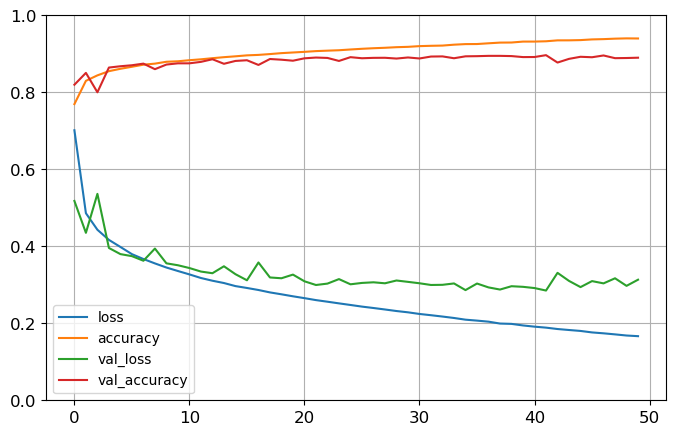

In [37]:
# Plotting
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
# Evaluating
modelo.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8871


[0.343445748090744, 0.8870999813079834]

In [39]:
# Class Names
class_names = ["T-shirt/top", 
                 "Trouser", 
                 "Pullover", 
                 "Dress", 
                 "Coat", 
                 "Sandal", 
                 "Shirt", 
                 "Sneaker", 
                 "Bag", 
                 "Ankle boot"]

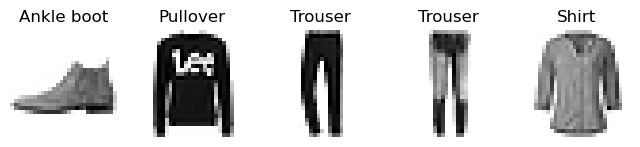

In [42]:
# Plotting prediction
X_new = X_test[:5]

# E então prever a probabilidade de cada classe para cada imagem
y_proba = modelo.predict(X_new)

# Vamos gravar as previsões das 5 imagens
y_pred = modelo.predict_classes(X_new)

# Plot
plt.figure(figsize = (8, 5))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap = "binary", interpolation = "nearest")
    plt.axis('off')
    plt.title(nomes_classes[y_test[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()